In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
house = pd.read_parquet('./data/clean_house.parquet')

In [24]:
house

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,lat,long,sqft_living15,sqft_lot15,month,grade_value,has_view,renovated,yr_since_renovate,total_rooms
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0.0,...,47.5112,-122.257,1340,5650,10,7,0,0.0,60.0,3.00
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0.0,...,47.7210,-122.319,1690,7639,12,7,0,1.0,24.0,6.75
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0.0,...,47.7379,-122.233,2720,8062,2,6,0,0.0,82.0,2.00
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0.0,...,47.5208,-122.393,1360,5000,12,7,0,0.0,50.0,12.00
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0.0,...,47.6168,-122.045,1800,7503,2,8,0,0.0,28.0,6.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0.0,...,47.6993,-122.346,1530,1509,5,8,0,0.0,6.0,7.50
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0.0,...,47.5107,-122.362,1830,7200,2,8,0,0.0,1.0,10.00
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0.0,...,47.5944,-122.299,1020,2007,6,7,0,0.0,6.0,1.50
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0.0,...,47.5345,-122.069,1410,1287,1,8,0,0.0,11.0,7.50


In [25]:
house['adj_sqft_living'] = house.sqft_living / house.yr_since_renovate

In [26]:
house['total_rooms'] = house.bathrooms * house.bedrooms

In [27]:
#Get correlation table of all numeric values of the housing data
corr_mat = house.corr(method='pearson')

#Get top right part of correlation table
upper_corr_mat = corr_mat.where(
    np.triu(np.ones(corr_mat.shape), k=1).astype(bool))

#Drop the non top right part and unstack the data
unique_corr = upper_corr_mat.unstack().dropna()

#Sort the values and get absolute values to account for negative correlation
sort_corr = unique_corr.abs().sort_values(ascending=False)

#Convert to data frame
new_corr = sort_corr.to_frame().reset_index()

#Make correlation data frame with just correlations that contain price
price_corr = new_corr[(new_corr.level_0 == 'price') | (new_corr.level_1 == 'price')]

#Rename columns
price_corr.columns = ['feature1','feature2','corr']

In [52]:
price_corr

,feature1,feature2,corr
14,sqft_living,price,0.701929
17,grade_value,price,0.667964
19,sqft_above,price,0.605392
22,sqft_living15,price,0.585267
28,bathrooms,price,0.525915
30,total_rooms,price,0.518426
45,view,price,0.396419
55,has_view,price,0.358193
66,sqft_basement,price,0.323794
69,bedrooms,price,0.315961


In [28]:
top_10 = price_corr[0:10]
top_10 = house[['price']+list(top_10.feature1)]

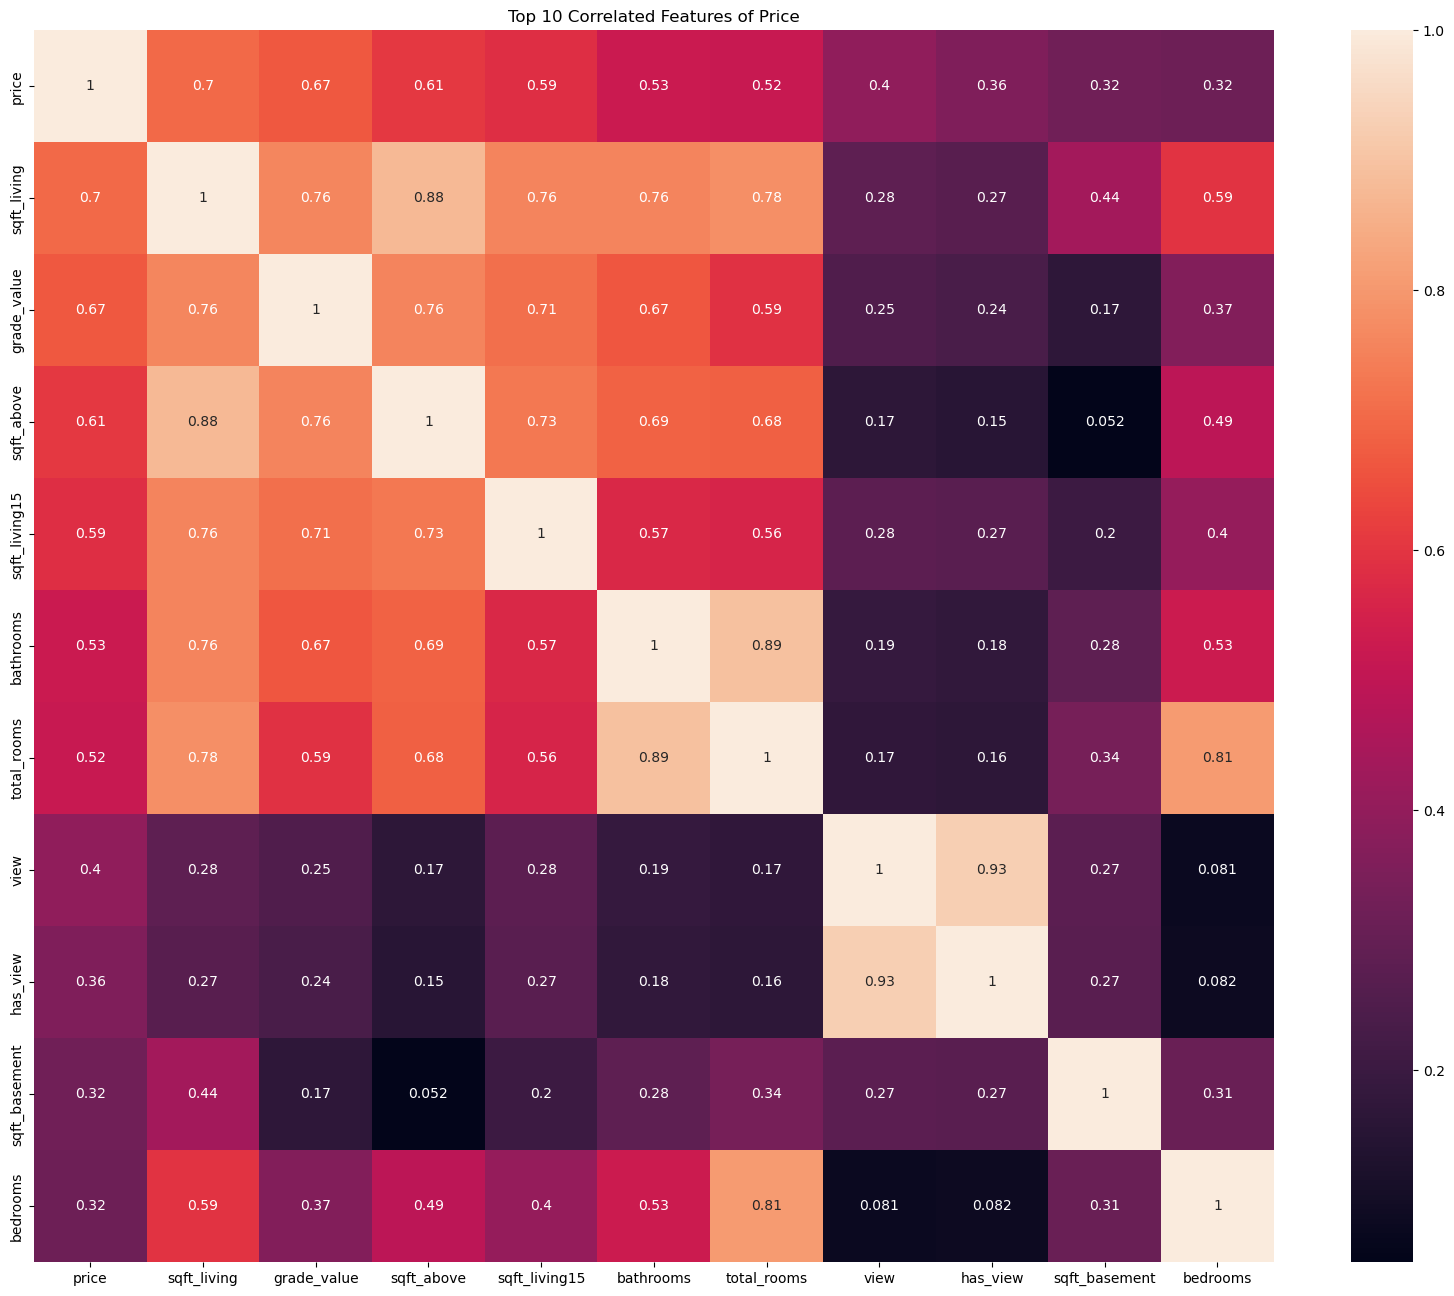

In [29]:
plt.figure(figsize=(20,16))
plt.title("Top 10 Correlated Features of Price")
sns.heatmap(top_10.corr().abs(),annot=True);

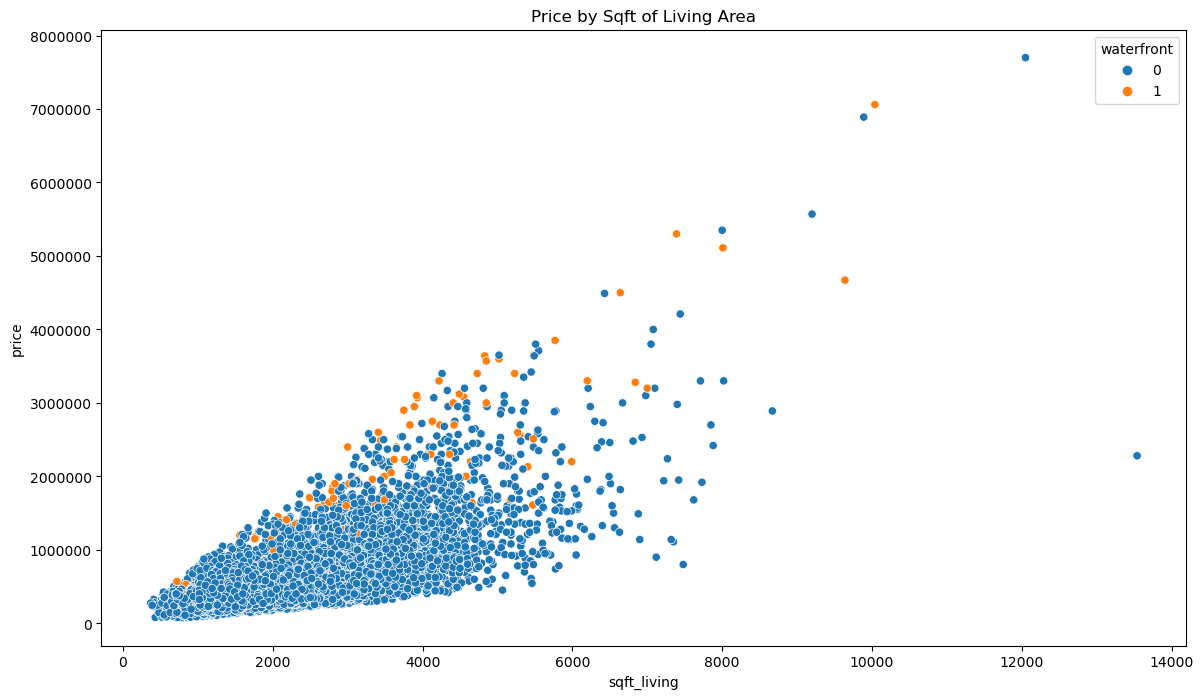

In [42]:
plt.figure(figsize=(14,8))
sns.scatterplot(x=house.sqft_living,y=house.price,hue=house.waterfront)
plt.title("Price by Sqft of Living Area")
plt.ticklabel_format(style='plain',axis='y');

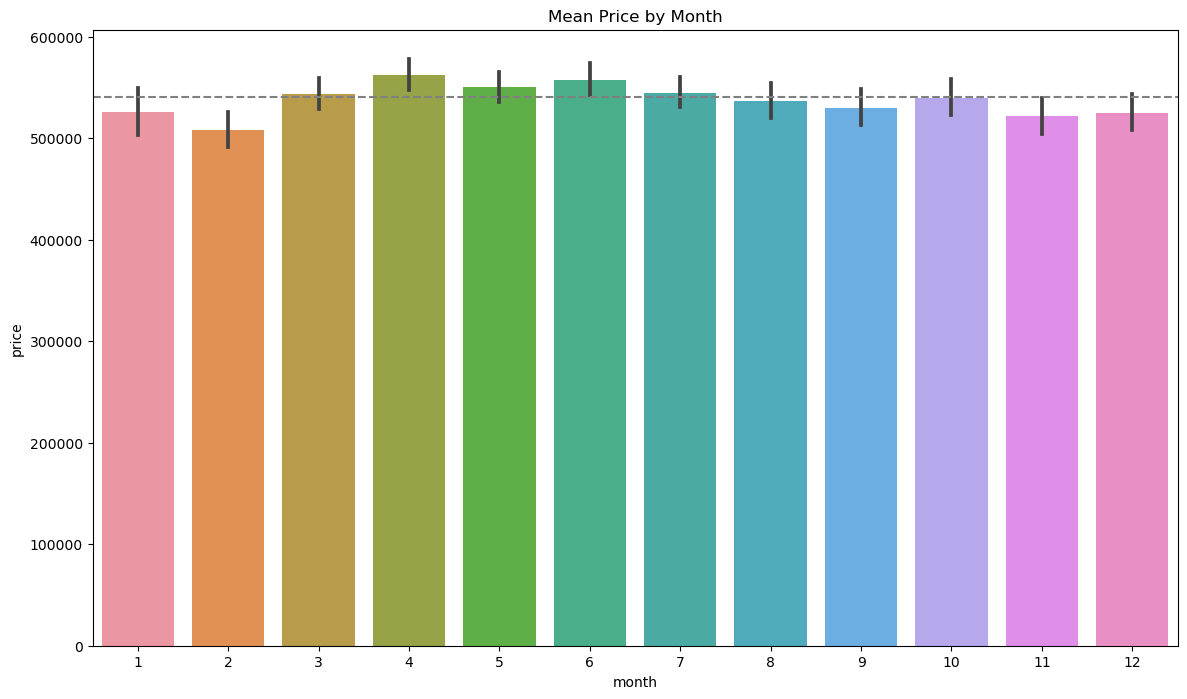

In [31]:
plt.figure(figsize=(14,8))
sns.barplot(x=house.month,y=house.price)
plt.axhline(house.price.mean(),linestyle ='--',color='gray')
plt.title('Mean Price by Month');

In [32]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 21596 non-null  int64         
 1   date               21596 non-null  datetime64[ns]
 2   price              21596 non-null  float64       
 3   bedrooms           21596 non-null  int64         
 4   bathrooms          21596 non-null  float64       
 5   sqft_living        21596 non-null  int64         
 6   sqft_lot           21596 non-null  int64         
 7   floors             21596 non-null  float64       
 8   waterfront         21596 non-null  int64         
 9   view               21596 non-null  float64       
 10  condition          21596 non-null  int64         
 11  grade              21596 non-null  object        
 12  sqft_above         21596 non-null  int64         
 13  sqft_basement      21596 non-null  int64         
 14  yr_bui

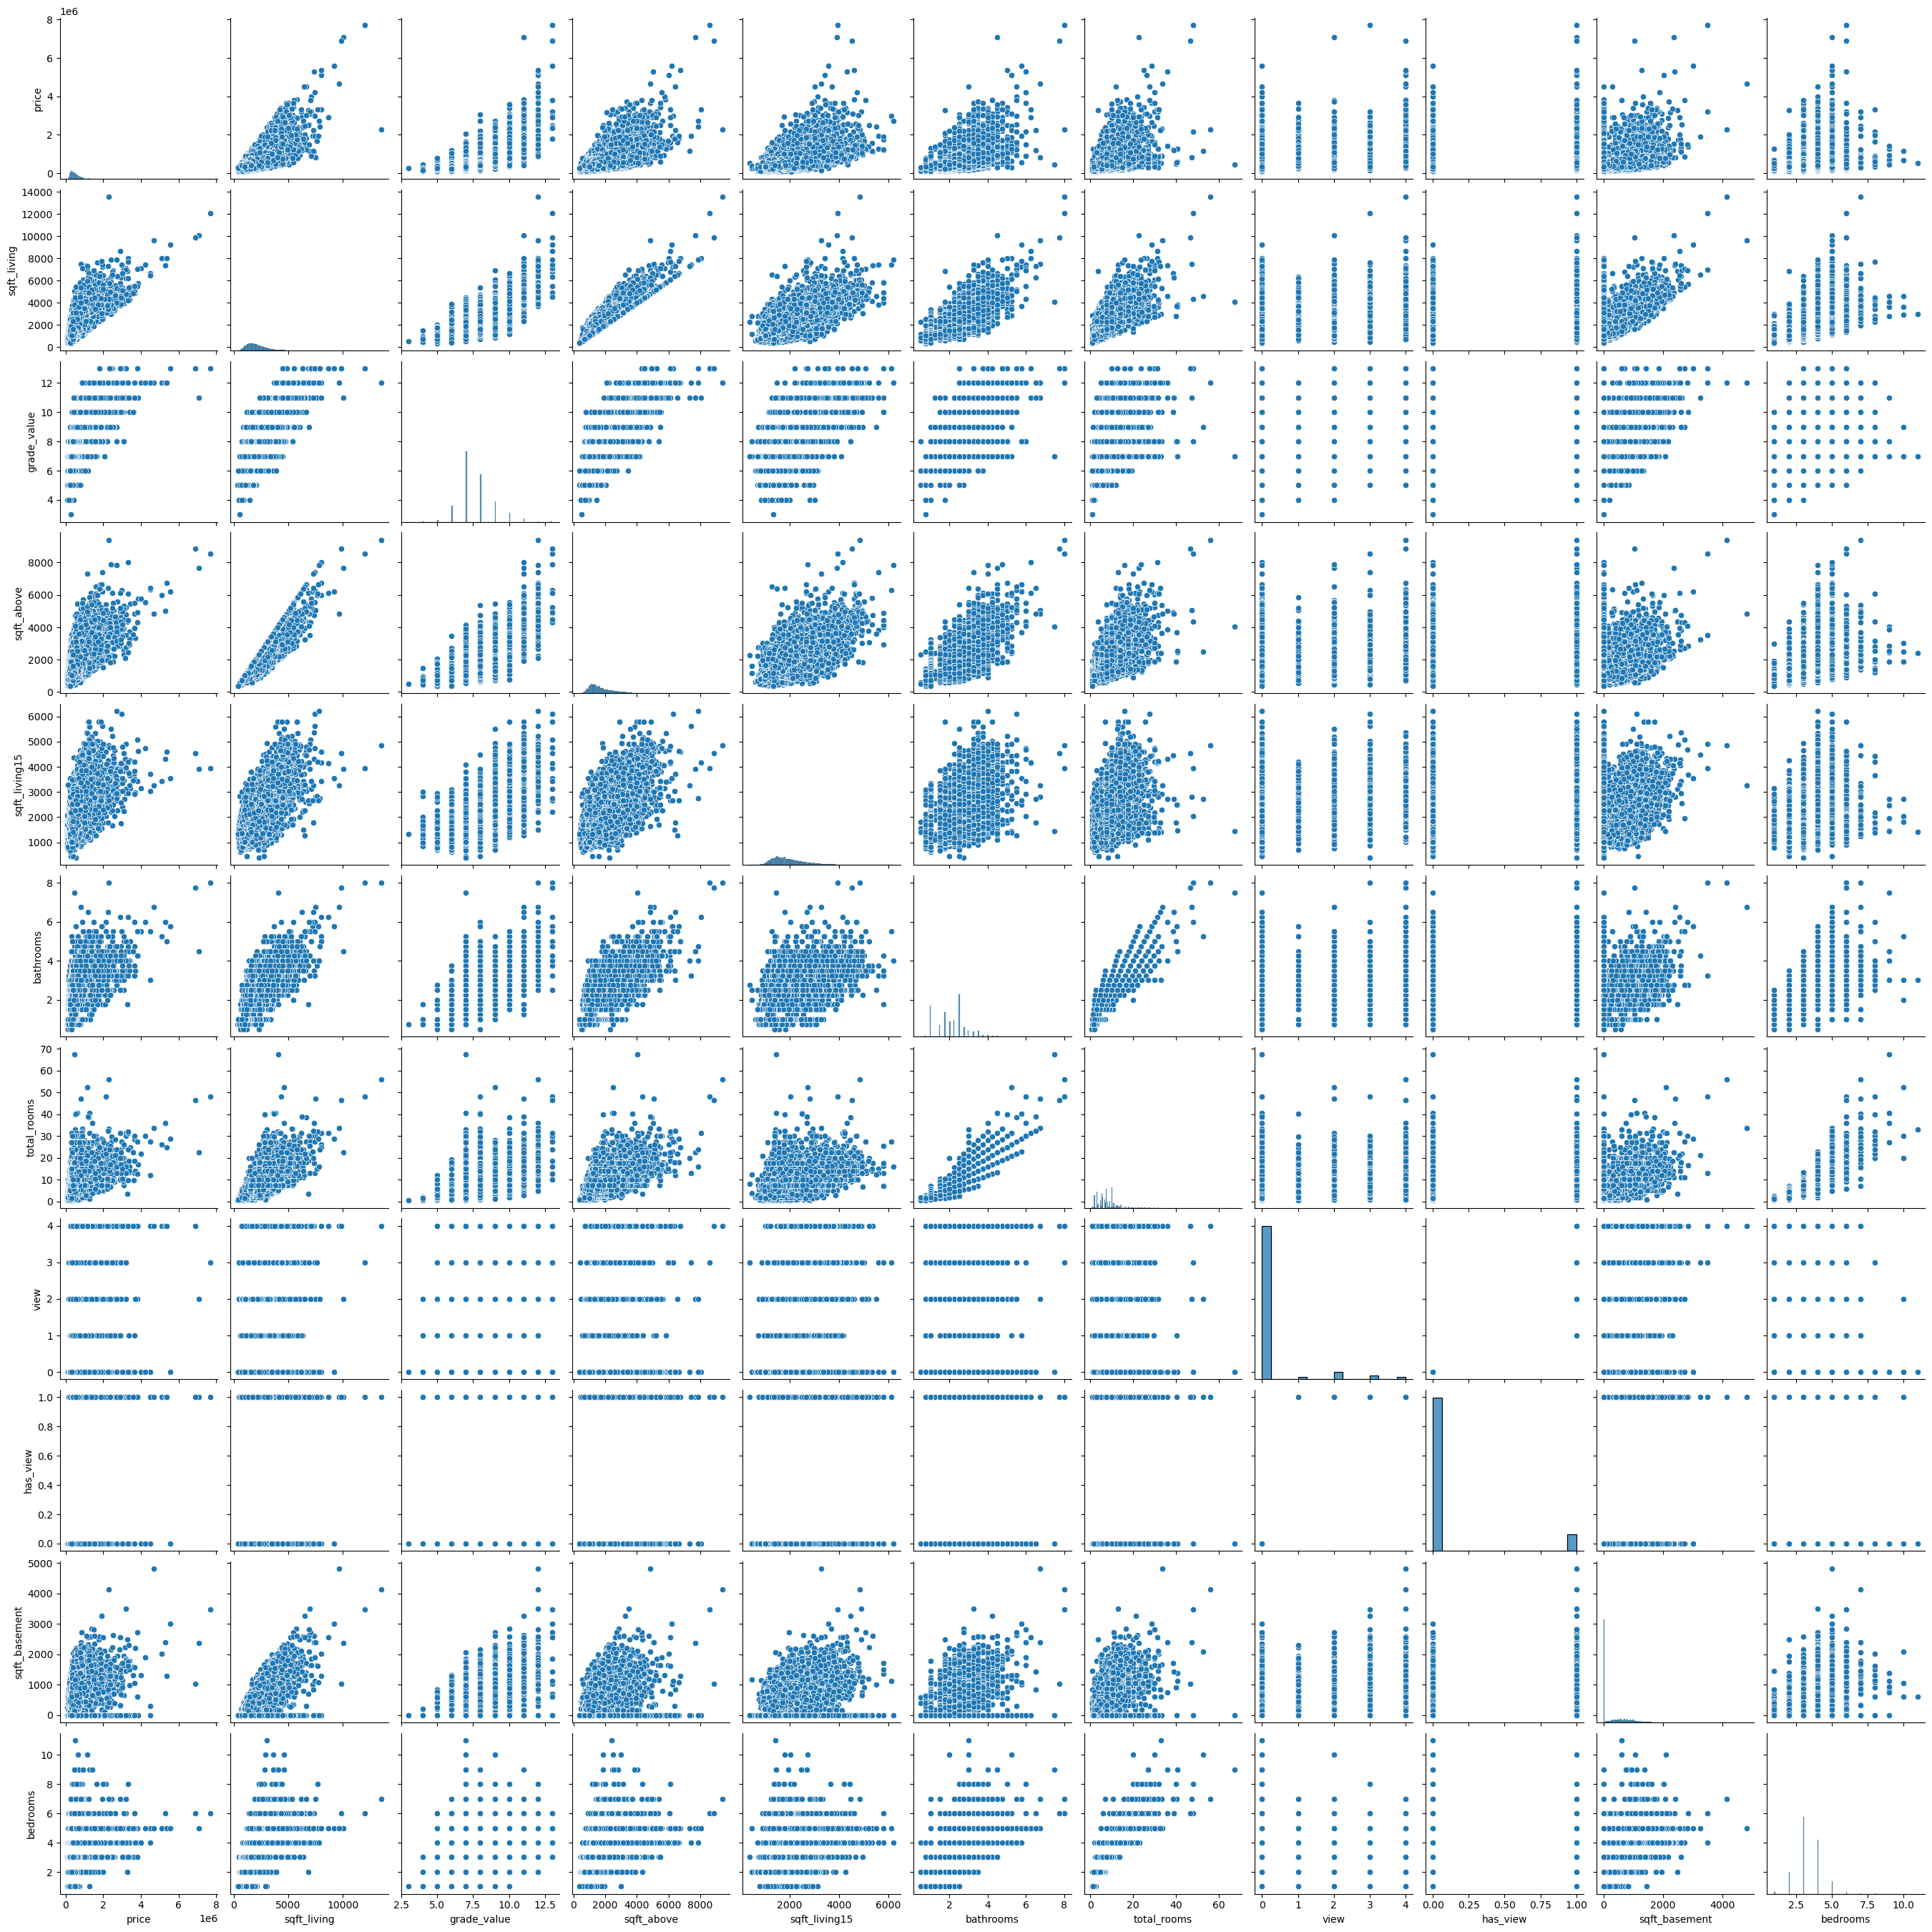

In [33]:
sns.pairplot(top_10);

<AxesSubplot:xlabel='adj_sqft_living', ylabel='price'>

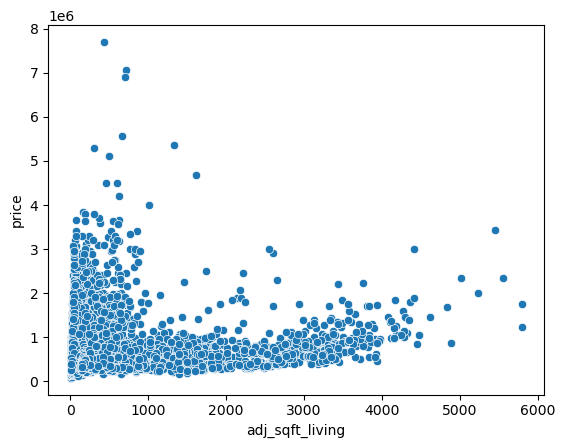

In [34]:
sns.scatterplot(x=house.adj_sqft_living,y=house.price)

In [65]:
house.mean()

C:\Users\capta\AppData\Local\Temp\ipykernel_23004\592001825.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  house.mean()
C:\Users\capta\AppData\Local\Temp\ipykernel_23004\592001825.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  house.mean()


id                   4.580575e+09
price                5.402920e+05
bedrooms             3.371828e+00
bathrooms            2.115843e+00
sqft_living          2.080343e+03
sqft_lot             1.509983e+04
floors               1.494119e+00
waterfront           6.760511e-03
view                 2.333766e-01
condition            3.409752e+00
sqft_above           1.788632e+03
sqft_basement        2.917117e+02
yr_built             1.971001e+03
yr_renovated         6.876139e+01
zipcode              9.807795e+04
lat                  4.756009e+01
long                -1.222140e+02
sqft_living15        1.986651e+03
sqft_lot15           1.275866e+04
month                6.573995e+00
grade_value          7.657946e+00
has_view             9.784219e-02
renovated            3.445082e-02
yr_since_renovate    4.205367e+01
total_rooms          7.501250e+00
adj_sqft_living               inf
dtype: float64

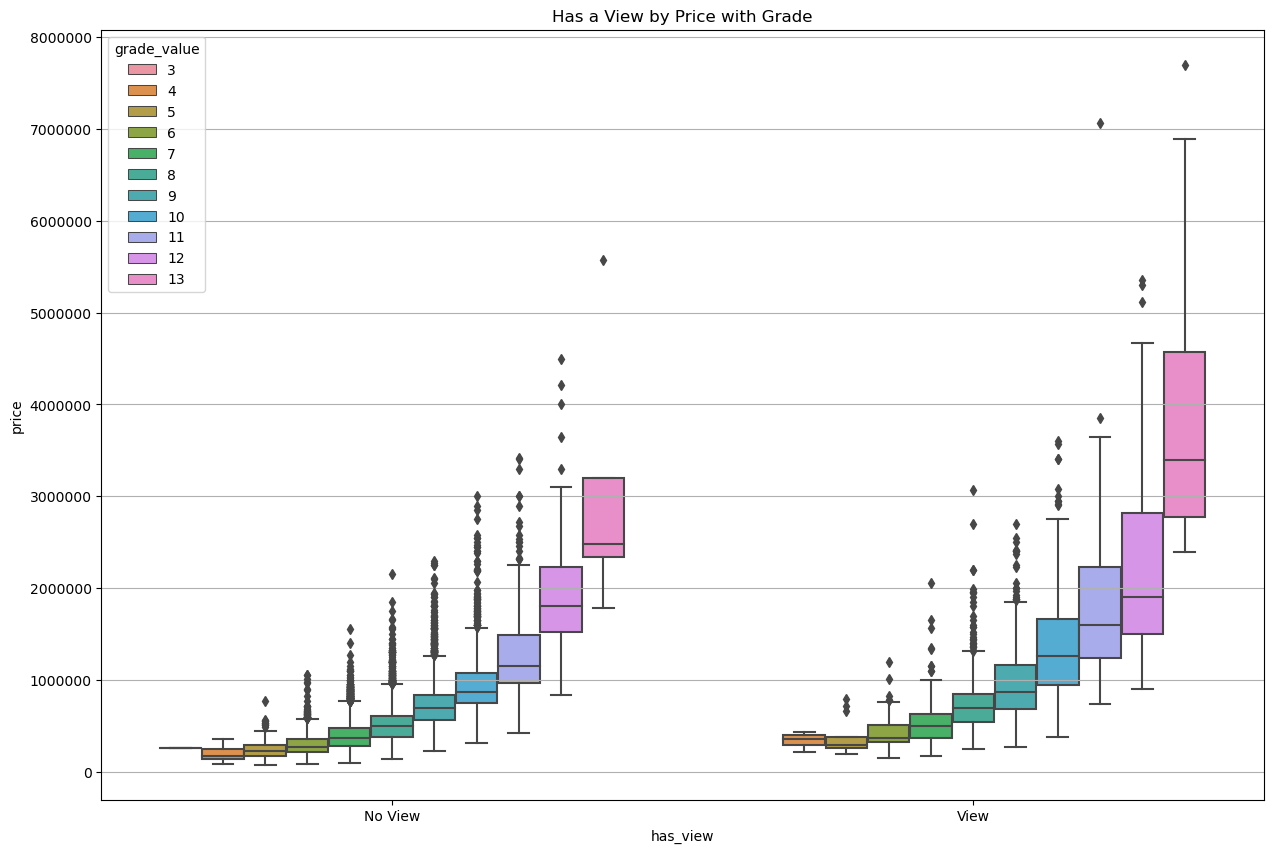

In [64]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(x=house.has_view,y=house.price,hue=house.grade_value)
plt.ticklabel_format(axis='y',style='plain')
ax.set_xticklabels(['No View', 'View'])
ax.yaxis.grid(True)
plt.title('Has a View by Price with Grade');

In [36]:
house.renovated.value_counts()

0.0    20852
1.0      744
Name: renovated, dtype: int64

In [37]:
house[house.renovated == 1]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,long,sqft_living15,sqft_lot15,month,grade_value,has_view,renovated,yr_since_renovate,total_rooms,adj_sqft_living
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0.0,...,-122.319,1690,7639,12,7,0,1.0,24.0,6.75,107.083333
35,9547205180,2014-06-13,696000.0,3,2.50,2300,3060,1.5,0,0.0,...,-122.310,1590,3264,6,8,0,1.0,13.0,7.50,176.923077
95,1483300570,2014-09-08,905000.0,4,2.50,3300,10250,1.0,0,0.0,...,-122.249,1950,6045,9,7,0,1.0,24.0,10.00,137.500000
103,2450000295,2014-10-07,1090000.0,3,2.50,2920,8113,2.0,0,0.0,...,-122.196,2370,8113,10,8,0,1.0,5.0,7.50,584.000000
125,4389200955,2015-03-02,1450000.0,4,2.75,2750,17789,1.5,0,0.0,...,-122.212,3060,11275,3,8,0,1.0,23.0,11.00,119.565217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19602,6392000625,2014-07-12,451000.0,2,1.00,900,6000,1.0,0,0.0,...,-122.289,1460,4800,7,7,0,1.0,11.0,2.00,81.818182
20041,126039256,2014-09-04,434900.0,3,2.00,1520,5040,2.0,0,0.0,...,-122.362,1860,8710,9,7,0,1.0,9.0,6.00,168.888889
20428,4305600360,2015-02-25,500012.0,4,2.50,2400,9612,1.0,0,0.0,...,-122.127,2430,5539,2,8,0,1.0,6.0,10.00,400.000000
20431,3319500628,2015-02-12,356999.0,3,1.50,1010,1546,2.0,0,0.0,...,-122.311,1010,1517,2,8,0,1.0,1.0,4.50,1010.000000


In [38]:
house.groupby('zipcode').mean().sort_values('view')

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,long,sqft_living15,sqft_lot15,month,grade_value,has_view,renovated,yr_since_renovate,total_rooms,adj_sqft_living
zipcode,,,,,,,,,,,,,,,,,,,,,
98148,5.579459e+09,2.849086e+05,3.140351,1.793860,1610.526316,8960.719298,1.210526,0.000000,0.000000,3.070175,...,-122.329316,1611.228070,8812.385965,6.578947,6.947368,0.000000,0.017544,50.964912,5.907895,172.981056
98031,4.475569e+09,3.003404e+05,3.498168,2.155678,1929.692308,12106.772894,1.443223,0.000000,0.007326,3.501832,...,-122.189304,1908.853480,8482.197802,6.487179,7.377289,0.003663,0.003663,32.996337,7.706960,96.804311
98002,4.850894e+09,2.342840e+05,3.326633,1.839196,1627.743719,7517.633166,1.334171,0.000000,0.010050,3.743719,...,-122.213357,1479.030151,7585.482412,6.698492,6.693467,0.005025,0.025126,46.075377,6.525126,166.788080
98077,3.153599e+09,6.828860e+05,3.616162,2.465909,2857.045455,54829.000000,1.641414,0.000000,0.010101,3.348485,...,-122.061202,2782.525253,45491.767677,6.651515,8.782828,0.005051,0.015152,29.752525,9.185606,129.802158
98168,3.204785e+09,2.403284e+05,2.996283,1.433086,1468.624535,11269.843866,1.159851,0.000000,0.014870,3.245353,...,-122.307877,1471.680297,9744.022305,6.550186,6.509294,0.007435,0.022305,61.159851,4.606877,79.242361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98022,4.014550e+09,3.167424e+05,3.158798,1.918455,1837.313305,74233.914163,1.324034,0.000000,0.630901,3.733906,...,-121.995549,1801.545064,51488.420601,6.832618,7.175966,0.253219,0.055794,39.879828,6.307940,123.826206
98166,4.043990e+09,4.643224e+05,3.377953,1.911417,2067.905512,13609.397638,1.250000,0.055118,0.665354,3.574803,...,-122.350303,1886.850394,12694.322835,6.291339,7.393701,0.271654,0.086614,53.267717,6.738189,123.524543
98040,4.199323e+09,1.194874e+06,4.028369,2.716312,3106.833333,13704.464539,1.505319,0.039007,0.780142,3.787234,...,-122.225592,2898.744681,12801.283688,6.453901,8.960993,0.336879,0.102837,39.560284,11.362589,NaN


C:\Users\capta\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='view', ylabel='Density'>

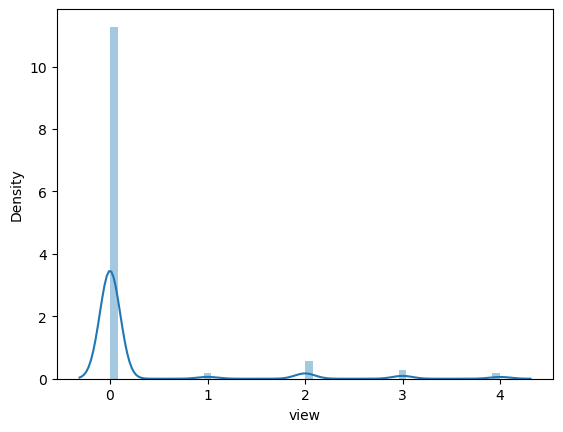

In [39]:
sns.distplot(house.view)

In [40]:
house.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'month', 'grade_value',
       'has_view', 'renovated', 'yr_since_renovate', 'total_rooms',
       'adj_sqft_living'],
      dtype='object')

In [41]:
house.groupby('view').mean()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,sqft_above,...,long,sqft_living15,sqft_lot15,month,grade_value,has_view,renovated,yr_since_renovate,total_rooms,adj_sqft_living
view,,,,,,,,,,,,,,,,,,,,,
0.0,4.569440e+09,4.969569e+05,3.347380,2.071113,1998.918493,14169.226505,1.491197,0.000000,3.399682,1747.068624,...,-122.209919,1925.200277,12175.419699,6.581584,7.566853,0.0,0.029564,41.680953,7.273687,NaN
1.0,4.617411e+09,8.133733e+05,3.536364,2.350000,2571.045455,12370.596970,1.392424,0.003030,3.512121,1935.739394,...,-122.286133,2407.345455,10759.700000,6.493939,8.115152,1.0,0.075758,48.548485,8.825000,NaN
2.0,4.780385e+09,7.913904e+05,3.567398,2.426594,2650.719958,22317.004180,1.513584,0.007315,3.492163,2082.936259,...,-122.239736,2427.344828,17355.149425,6.450366,8.315569,1.0,0.053292,47.194357,9.120690,NaN
3.0,4.340827e+09,9.732852e+05,3.671260,2.670276,3016.846457,34877.125984,1.564961,0.027559,3.474409,2277.029528,...,-122.243360,2702.208661,23922.736220,6.574803,8.730315,1.0,0.096457,42.277559,10.234744,NaN
4.0,5.006236e+09,1.464565e+06,3.632075,2.792453,3347.232704,21634.091195,1.606918,0.389937,3.569182,2516.518868,...,-122.263261,2845.650943,18899.113208,6.562893,9.072327,1.0,0.135220,42.320755,10.829403,NaN
